## Oscillating solution (starting off center)

##### For this, you also need to replace x ->rx is line 176 of Prob_3d.f90

<IPython.core.display.Javascript object>


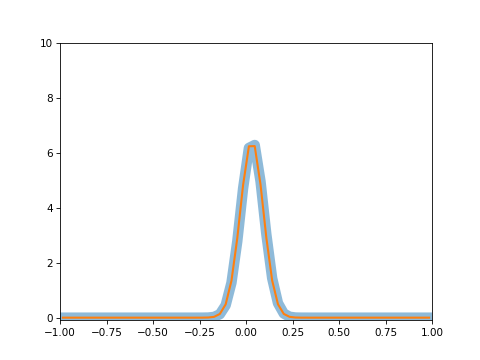

yt : [INFO     ] 2019-05-17 16:21:22,463 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-05-17 16:21:22,465 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:21:22,466 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:21:22,467 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:21:22,820 Parameters: current_time              = 0.125778925355488
yt : [INFO     ] 2019-05-17 16:21:22,823 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:21:22,842 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:21:22,849 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:21:23,314 Parameters: current_time              = 0.284058685335332
yt : [INFO     ] 2019-05-17 16:21:23,316 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:21:23,318 Parameters: domain_left_ed

yt : [INFO     ] 2019-05-17 16:21:29,640 Parameters: current_time              = 3.44965388493222
yt : [INFO     ] 2019-05-17 16:21:29,641 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:21:29,642 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:21:29,644 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:21:29,895 Parameters: current_time              = 3.60793364491207
yt : [INFO     ] 2019-05-17 16:21:29,896 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:21:29,898 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:21:29,903 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:21:30,217 Parameters: current_time              = 3.76621340489191
yt : [INFO     ] 2019-05-17 16:21:30,219 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:21:30,228 Parameters: dom

yt : [INFO     ] 2019-05-17 16:21:35,992 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:21:36,236 Parameters: current_time              = 6.9318086044888
yt : [INFO     ] 2019-05-17 16:21:36,238 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:21:36,239 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:21:36,240 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:21:36,487 Parameters: current_time              = 7.09008836446865
yt : [INFO     ] 2019-05-17 16:21:36,489 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:21:36,492 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:21:36,494 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:21:36,821 Parameters: current_time              = 7.24836812444849
yt : [INFO     ] 2019-05-17 16:21:36,822 Parameters: doma

In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import math as mp
import matplotlib
from pylab import *
import matplotlib.animation as manimation
import yt

FFMpegWriter = manimation.writers['ffmpeg']
writer = FFMpegWriter(fps=15)

fig = plt.figure()
l, = plt.plot([], [], linewidth=10, alpha = 0.5)
m, = plt.plot([], [], linewidth=2)

hbaroverm = 0.01917152/2.5
omega = 1.0
igp = 0.256
xlo = -1.0
xhi = 1.0

nmax=500   #number of frames
plt.xlim(xlo, xhi)
plt.ylim(-0.1, 10.)

with writer.saving(fig, "har-osc.mp4", 400):
    for j in range(0,int(nmax),10):
        ds = yt.load("plt_gauss_no_gravity_igp00"+str(j).zfill(3))
        ad = ds.all_data()
        list1 = ad[("boxlib","AxDens")]
        
        N=int(int(len(list1))**(1/3)+0.5)
        xlo = ds.domain_left_edge[0]
        xhi = ds.domain_right_edge[0]
        boxsize = float(xhi - xlo)
        x_range = np.arange(float(xlo)+0.5*float(boxsize/N), float(xhi)+0.5*float(boxsize/N), float(boxsize/N))
        time = ds.current_time

        #Analytical solution 
        ana_dens = [np.exp(-((x-igp*np.cos(omega*time))**2)*omega/hbaroverm)*np.sqrt(omega/np.pi/hbaroverm) for x in x_range]
        l.set_data(x_range, ana_dens)
        
        #Numerical solution 
        density1d = np.zeros((N))
        for i in range(0, N):
            density1d[i]=list1[N*(N*i+int(N/2))+int(N/2)]
        m.set_data(x_range, density1d)
            
        writer.grab_frame()